In [153]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from  scipy import stats
%matplotlib inline

In [6]:
warnings.filterwarnings("ignore")

In [9]:
#importing the dataset
data = pd.read_csv('song_data.csv', encoding='ISO-8859-1')
data.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [10]:
del data["Unnamed: 0"]

In [11]:
data.head()

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [19]:
#Renaming the columns
data.rename(columns={'Track.Name':'track_name','Artist.Name':'artist_name','Beats.Per.Minute':'beats_per_minute','Loudness..dB..':'Loudness(dB)','Valence.':'Valence','Length.':'Length', 'Acousticness..':'Acousticness','Speechiness.':'Speechiness'},inplace=True)
data.head()

,track_name,artist_name,Genre,beats_per_minute,Energy,Danceability,Loudness(dB),Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [23]:
print(data.dtypes)

track_name          object
artist_name         object
Genre               object
beats_per_minute     int64
Energy               int64
Danceability         int64
Loudness(dB)         int64
Liveness             int64
Valence              int64
Length               int64
Acousticness         int64
Speechiness          int64
Popularity           int64
dtype: object


In [24]:
data.head()

,track_name,artist_name,Genre,beats_per_minute,Energy,Danceability,Loudness(dB),Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [25]:
print(type(data['Genre']))

<class 'pandas.core.series.Series'>


In [39]:
genre_group=data.groupby('Genre').size()
genre_group

Genre
atl hip hop         1
australian pop      1
big room            1
boy band            1
brostep             2
canadian hip hop    3
canadian pop        2
country rap         2
dance pop           8
dfw rap             2
edm                 3
electropop          2
escape room         1
latin               5
panamanian pop      2
pop                 7
pop house           1
r&b en espanol      1
reggaeton           2
reggaeton flow      2
trap music          1
dtype: int64

In [36]:
#if we dataframe.values then we get only the array
#means .values return the array
#and if you want to get list then you have to convert it into tolist
genre_list = data['Genre'].values
genre_list

array(['canadian pop', 'reggaeton flow', 'dance pop', 'pop', 'dfw rap',
       'pop', 'trap music', 'pop', 'country rap', 'electropop',
       'reggaeton', 'dance pop', 'pop', 'panamanian pop',
       'canadian hip hop', 'dance pop', 'latin', 'dfw rap',
       'canadian hip hop', 'escape room', 'pop house', 'country rap',
       'reggaeton flow', 'latin', 'electropop', 'canadian pop',
       'australian pop', 'canadian hip hop', 'latin', 'latin', 'edm',
       'dance pop', 'reggaeton', 'atl hip hop', 'dance pop', 'big room',
       'panamanian pop', 'pop', 'boy band', 'dance pop', 'edm',
       'dance pop', 'dance pop', 'pop', 'r&b en espanol', 'brostep',
       'latin', 'brostep', 'edm', 'pop'], dtype=object)

In [41]:
#Here it converts from the array into list
genre_list.tolist()

['canadian pop',
 'reggaeton flow',
 'dance pop',
 'pop',
 'dfw rap',
 'pop',
 'trap music',
 'pop',
 'country rap',
 'electropop',
 'reggaeton',
 'dance pop',
 'pop',
 'panamanian pop',
 'canadian hip hop',
 'dance pop',
 'latin',
 'dfw rap',
 'canadian hip hop',
 'escape room',
 'pop house',
 'country rap',
 'reggaeton flow',
 'latin',
 'electropop',
 'canadian pop',
 'australian pop',
 'canadian hip hop',
 'latin',
 'latin',
 'edm',
 'dance pop',
 'reggaeton',
 'atl hip hop',
 'dance pop',
 'big room',
 'panamanian pop',
 'pop',
 'boy band',
 'dance pop',
 'edm',
 'dance pop',
 'dance pop',
 'pop',
 'r&b en espanol',
 'brostep',
 'latin',
 'brostep',
 'edm',
 'pop']

In [43]:
#we can do some analysis on the basis of the artistnames
list(data.columns)

['track_name',
 'artist_name',
 'Genre',
 'beats_per_minute',
 'Energy',
 'Danceability',
 'Loudness(dB)',
 'Liveness',
 'Valence',
 'Length',
 'Acousticness',
 'Speechiness',
 'Popularity']

In [45]:
artist_size=data.groupby('artist_name').size()
artist_size

artist_name
Ali Gatie           1
Anuel AA            1
Ariana Grande       2
Bad Bunny           1
Billie Eilish       2
Chris Brown         1
DJ Snake            1
Daddy Yankee        1
Drake               1
Ed Sheeran          4
J Balvin            2
Jhay Cortez         1
Jonas Brothers      1
Katy Perry          1
Khalid              1
Kygo                1
Lady Gaga           1
Lauv                1
Lewis Capaldi       1
Lil Nas X           2
Lil Tecca           1
Lizzo               1
Lunay               1
MEDUZA              1
Maluma              1
Marshmello          2
Martin Garrix       1
Nicky Jam           1
Post Malone         2
ROSALÍA             1
Sam Smith           1
Sech                2
Shawn Mendes        2
Taylor Swift        1
The Chainsmokers    2
Tones and I         1
Y2K                 1
Young Thug          1
dtype: int64

In [47]:
artist_list=data['artist_name'].values
artist_list
#Again it is an array and not an list
#So we have to convert into the list

array(['Shawn Mendes', 'Anuel AA', 'Ariana Grande', 'Ed Sheeran',
       'Post Malone', 'Ed Sheeran', 'Lil Tecca', 'Sam Smith', 'Lil Nas X',
       'Billie Eilish', 'Bad Bunny', 'DJ Snake', 'Lewis Capaldi', 'Sech',
       'Drake', 'Chris Brown', 'J Balvin', 'Post Malone', 'Y2K', 'Lizzo',
       'MEDUZA', 'Lil Nas X', 'Jhay Cortez', 'Lunay', 'Billie Eilish',
       'Shawn Mendes', 'Tones and I', 'Ali Gatie', 'Daddy Yankee',
       'J Balvin', 'The Chainsmokers', 'Ariana Grande', 'Maluma',
       'Young Thug', 'Katy Perry', 'Martin Garrix', 'Sech', 'Ed Sheeran',
       'Jonas Brothers', 'Lauv', 'Kygo', 'Taylor Swift', 'Lady Gaga',
       'Khalid', 'ROSALÍA', 'Marshmello', 'Nicky Jam', 'Marshmello',
       'The Chainsmokers', 'Ed Sheeran'], dtype=object)

In [48]:
artist_list.tolist()

['Shawn Mendes',
 'Anuel AA',
 'Ariana Grande',
 'Ed Sheeran',
 'Post Malone',
 'Ed Sheeran',
 'Lil Tecca',
 'Sam Smith',
 'Lil Nas X',
 'Billie Eilish',
 'Bad Bunny',
 'DJ Snake',
 'Lewis Capaldi',
 'Sech',
 'Drake',
 'Chris Brown',
 'J Balvin',
 'Post Malone',
 'Y2K',
 'Lizzo',
 'MEDUZA',
 'Lil Nas X',
 'Jhay Cortez',
 'Lunay',
 'Billie Eilish',
 'Shawn Mendes',
 'Tones and I',
 'Ali Gatie',
 'Daddy Yankee',
 'J Balvin',
 'The Chainsmokers',
 'Ariana Grande',
 'Maluma',
 'Young Thug',
 'Katy Perry',
 'Martin Garrix',
 'Sech',
 'Ed Sheeran',
 'Jonas Brothers',
 'Lauv',
 'Kygo',
 'Taylor Swift',
 'Lady Gaga',
 'Khalid',
 'ROSALÍA',
 'Marshmello',
 'Nicky Jam',
 'Marshmello',
 'The Chainsmokers',
 'Ed Sheeran']

In [49]:
data.isnull().sum()

track_name          0
artist_name         0
Genre               0
beats_per_minute    0
Energy              0
Danceability        0
Loudness(dB)        0
Liveness            0
Valence             0
Length              0
Acousticness        0
Speechiness         0
Popularity          0
dtype: int64

In [50]:
#nice there is no null values in it

In [51]:
data.describe()

,beats_per_minute,Energy,Danceability,Loudness(dB),Liveness,Valence,Length,Acousticness,Speechiness,Popularity
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000
std,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489
min,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000
25%,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000
50%,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000
75%,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000
max,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000,95.000000


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
track_name          50 non-null object
artist_name         50 non-null object
Genre               50 non-null object
beats_per_minute    50 non-null int64
Energy              50 non-null int64
Danceability        50 non-null int64
Loudness(dB)        50 non-null int64
Liveness            50 non-null int64
Valence             50 non-null int64
Length              50 non-null int64
Acousticness        50 non-null int64
Speechiness         50 non-null int64
Popularity          50 non-null int64
dtypes: int64(10), object(3)
memory usage: 5.2+ KB


In [53]:
pd.set_option('precision',3)

In [55]:
data.describe()

,beats_per_minute,Energy,Danceability,Loudness(dB),Liveness,Valence,Length,Acousticness,Speechiness,Popularity
count,50.000,50.000,50.00,50.000,50.000,50.000,50.000,50.000,50.000,50.000
mean,120.060,64.060,71.38,-5.660,14.660,54.600,200.960,22.160,12.480,87.500
std,30.898,14.232,11.93,2.056,11.118,22.336,39.144,18.996,11.162,4.491
min,85.000,32.000,29.00,-11.000,5.000,10.000,115.000,1.000,3.000,70.000
25%,96.000,55.250,67.00,-6.750,8.000,38.250,176.750,8.250,5.000,86.000
50%,104.500,66.500,73.50,-6.000,11.000,55.500,198.000,15.000,7.000,88.000
75%,137.500,74.750,79.75,-4.000,15.750,69.500,217.500,33.750,15.000,90.750
max,190.000,88.000,90.00,-2.000,58.000,95.000,309.000,75.000,46.000,95.000


In [56]:
#It means somewhere negative values are also there 
#it is just the observation

In [57]:
#Finding out the skew for each attribute
skewness=data.skew()
print(skewness)

beats_per_minute    0.855
Energy             -0.453
Danceability       -1.380
Loudness(dB)       -0.832
Liveness            2.204
Valence            -0.046
Length              0.749
Acousticness        1.135
Speechiness         1.378
Popularity         -1.503
dtype: float64


In [58]:
#it shows the skewness that is the spread of the tail where if tail is
#right side means positively skewed otherwise negatively skewed

In [61]:
#given skewness provided by the each attribute shows

In [69]:
# Removing the skew by using the boxcox transformations
transform=np.asarray(data['Liveness'].values)
#df_transform = stats.boxcox(transform)[0]
# Plotting a histogram to show the difference 
#plt.hist(df['Liveness'],bins=10) #original data
#plt.show()
#plt.hist(df_transform,bins=10) #corrected skew data
#plt.show()
transform

array([ 8,  8, 16,  8, 11,  9,  7,  8, 11, 10, 24, 15, 11,  6, 12, 16, 11,
        7, 14, 12,  7, 12,  9, 44, 12, 13, 18, 19,  6, 36, 10,  9,  9, 13,
       32, 14, 11, 36, 11,  6, 10,  7, 23,  6,  5, 58,  8, 17, 41,  7])

In [70]:
#Return a positive dataset transformed by a Box-Cox power transformation.

'''The Box-Cox transform is given by:

y = (x**lmbda - 1) / lmbda,  for lmbda > 0
    log(x),                  for lmbda = 0'''

'The Box-Cox transform is given by:\n\ny = (x**lmbda - 1) / lmbda,  for lmbda > 0\n    log(x),                  for lmbda = 0'

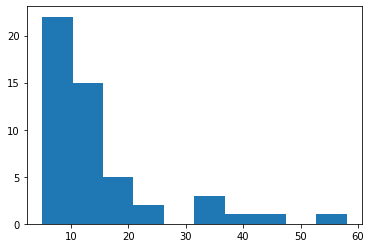

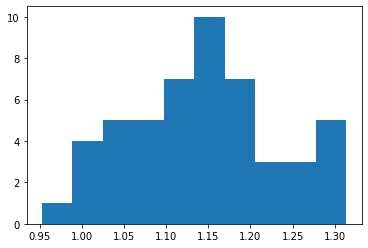

In [88]:
# Removing the skew by using the boxcox transformations
transform=np.asarray(data['Liveness'].values)
df_transform = stats.boxcox(transform)[0]
#df_transform
#Plotting a histogram to show the difference 
plt.hist(data['Liveness'],bins=10) #original data
plt.show()
plt.hist(df_transform,bins=10) #corrected skew data
plt.show()

In [89]:
#This is after the apply of the boxcox function simply

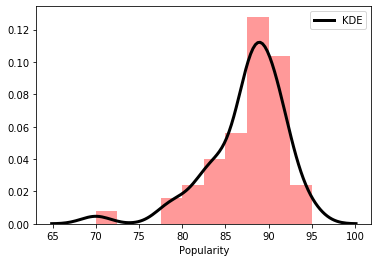

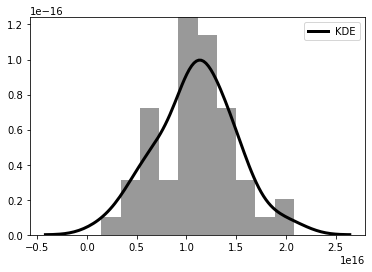

In [103]:
transform1=np.asarray(data[['Popularity']].values)
df_transform1 = stats.boxcox(transform1)[0]
# Plotting a histogram to show the difference 
# plt.hist(df['Popularity'],bins=10) original data
# plt.show()
# plt.hist(df_transform1,bins=10) #corrected skew data
# plt.show()
sns.distplot(data['Popularity'],bins=10,kde=True,kde_kws={"color": "k", "lw": 3, "label": "KDE"},color='red')
plt.show()
sns.distplot(df_transform1,bins=10,kde=True,kde_kws={"color": "k", "lw": 3, "label": "KDE"},color='black') #corrected skew data
plt.show()

#this plot is just for both the histogram and the corresponding distribututiona and this is done with the help of 
#Kdeplot

In [ ]:
#This function combines the matplotlib hist function (with automatic calculation of a good default bin size) 
#with the seaborn kdeplot() and rugplot() functions. It can also fit scipy.
#stats distributions and plot the estimated PDF over the data.

In [108]:
pd.set_option('display.width',100)
pd.set_option('precision',3)

In [109]:
data.describe()

,beats_per_minute,Energy,Danceability,Loudness(dB),Liveness,Valence,Length,Acousticness,Speechiness,Popularity
count,50.000,50.000,50.00,50.000,50.000,50.000,50.000,50.000,50.000,50.000
mean,120.060,64.060,71.38,-5.660,14.660,54.600,200.960,22.160,12.480,87.500
std,30.898,14.232,11.93,2.056,11.118,22.336,39.144,18.996,11.162,4.491
min,85.000,32.000,29.00,-11.000,5.000,10.000,115.000,1.000,3.000,70.000
25%,96.000,55.250,67.00,-6.750,8.000,38.250,176.750,8.250,5.000,86.000
50%,104.500,66.500,73.50,-6.000,11.000,55.500,198.000,15.000,7.000,88.000
75%,137.500,74.750,79.75,-4.000,15.750,69.500,217.500,33.750,15.000,90.750
max,190.000,88.000,90.00,-2.000,58.000,95.000,309.000,75.000,46.000,95.000


In [113]:
corr_matrix=data.corr(method='spearman')
corr_matrix

,beats_per_minute,Energy,Danceability,Loudness(dB),Liveness,Valence,Length,Acousticness,Speechiness,Popularity
beats_per_minute,1.000,0.012,-0.092,0.014,-0.033,-0.048,-0.198,-0.010,0.392,0.217
Energy,0.012,1.000,-0.049,0.635,0.013,0.467,0.189,-0.211,-0.035,-0.044
Danceability,-0.092,-0.049,1.000,0.009,-0.261,0.155,-0.079,-0.128,0.104,-0.141
Loudness(dB),0.014,0.635,0.009,1.000,0.114,0.317,0.165,-0.040,-0.063,0.072
Liveness,-0.033,0.013,-0.261,0.114,1.000,-0.187,0.202,0.204,-0.137,0.012
Valence,-0.048,0.467,0.155,0.317,-0.187,1.000,-0.081,-0.053,-0.095,-0.265
Length,-0.198,0.189,-0.079,0.165,0.202,-0.081,1.000,-0.005,0.020,-0.122
Acousticness,-0.010,-0.211,-0.128,-0.040,0.204,-0.053,-0.005,1.000,0.017,0.036
Speechiness,0.392,-0.035,0.104,-0.063,-0.137,-0.095,0.020,0.017,1.000,0.165
Popularity,0.217,-0.044,-0.141,0.072,0.012,-0.265,-0.122,0.036,0.165,1.000


In [127]:
#The Spearman correlation coefficient is defined as 
#the Pearson correlation coefficient between the rank variables
length=np.arange(len(np.asarray(genre_list)))
length

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

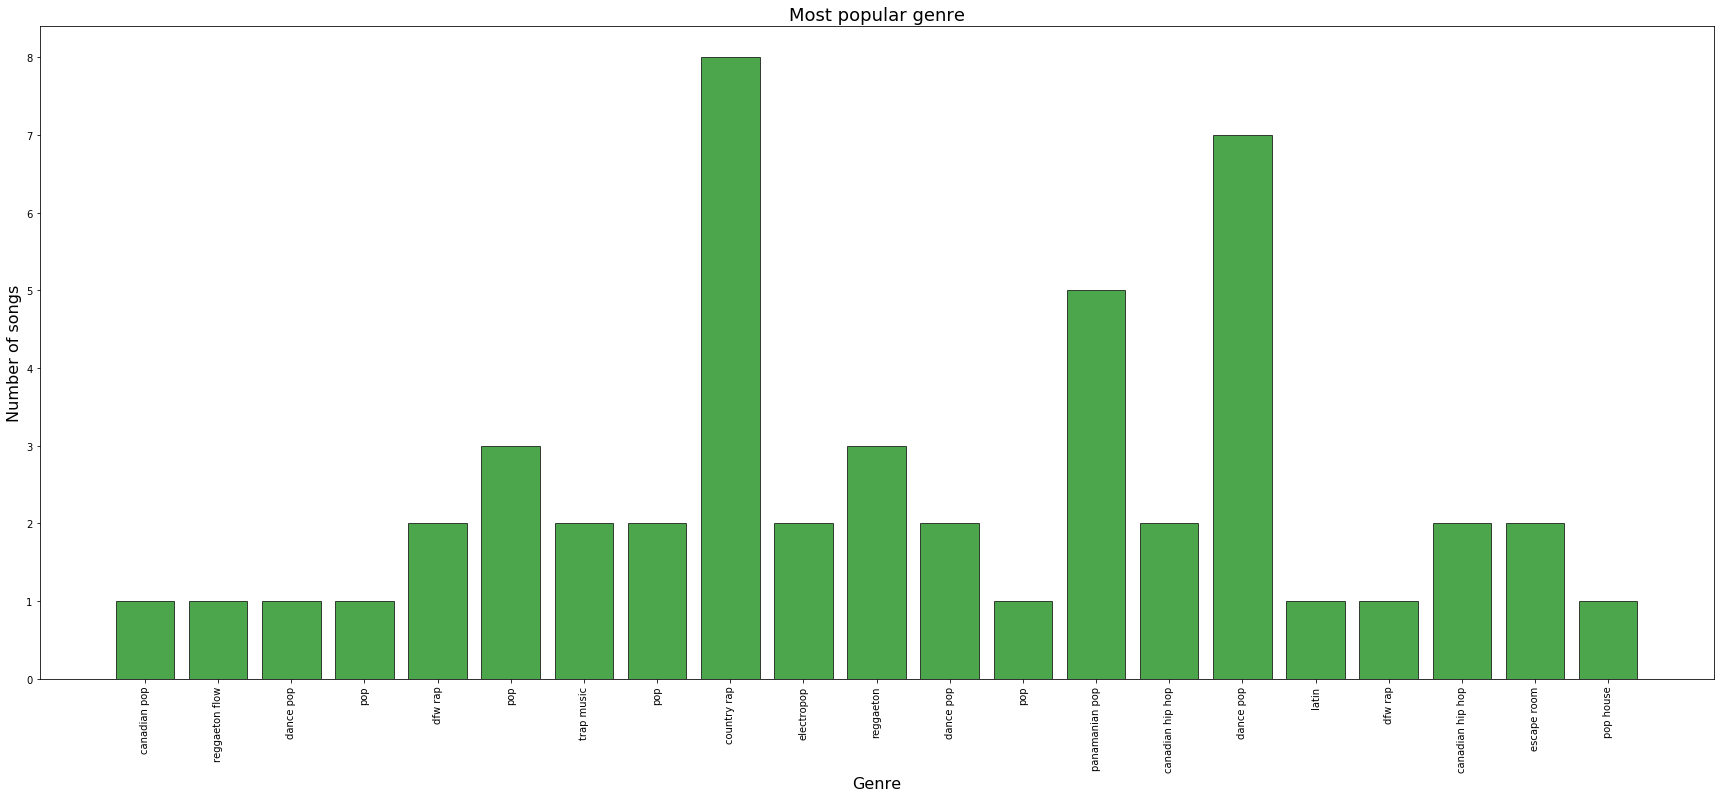

In [144]:
# Bar graph to see the number of songs of each genre
fig, ax=plt.subplots(figsize=(30,12))
length=np.arange(len(genre_group))
plt.bar(length,genre_group,color='green',edgecolor='black',alpha=0.7)
plt.xticks(length,genre_list,rotation=90)
plt.title('Most popular genre',fontsize=18)
plt.xlabel('Genre',fontsize=16)
plt.ylabel('Number of songs',fontsize=16)
plt.show()

(10.0, 0.0)

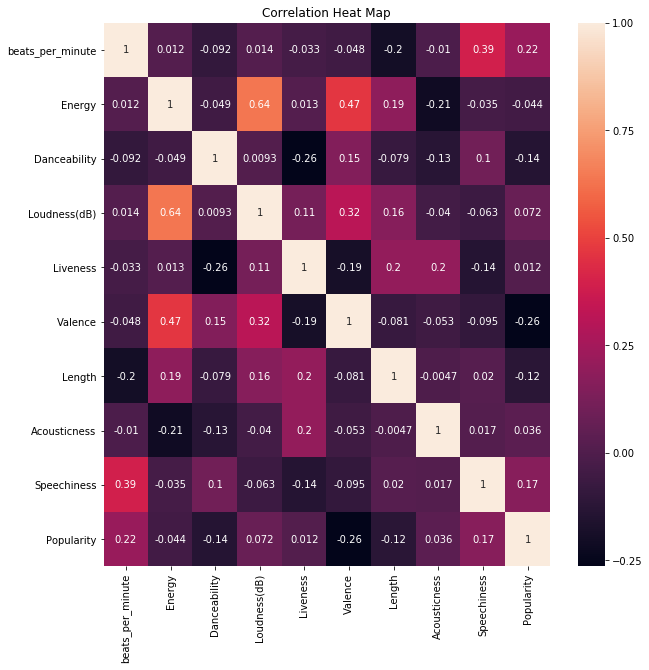

In [157]:
#drawing the heatmap for seeing the correlation between the other two
plt.figure(figsize=(10,10))
plt.title("Correlation Heat Map")
ax = sns.heatmap(corr_matrix, annot=True) #notation: "annot" not "annote"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

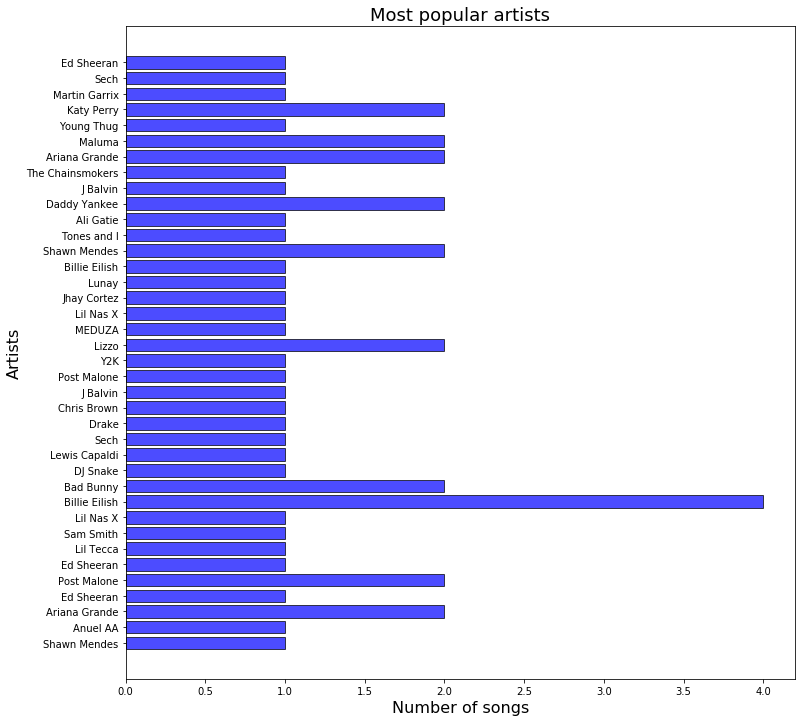

In [159]:
fig, ax=plt.subplots(figsize=(12,12))
length=np.arange(len(artist_size))
plt.barh(length,artist_size,color='b',edgecolor='black',alpha=0.7)
plt.yticks(length,artist_list)
plt.title('Most popular artists',fontsize=18)
plt.ylabel('Artists',fontsize=16)
plt.xlabel('Number of songs',fontsize=16)
plt.show()

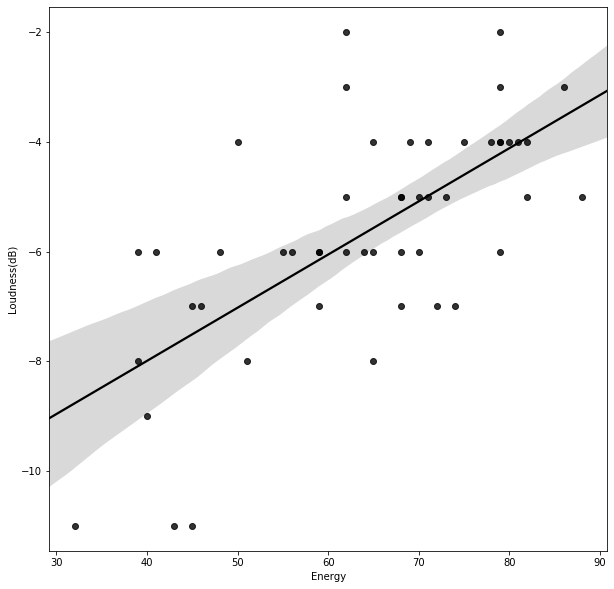

In [165]:
# Analysing the relationship between energy and loudness
#it can draw a linear regression line also 
#that is why it is also called regression plot
fig=plt.subplots(figsize=(10,10))
sns.regplot(x='Energy',y='Loudness(dB)',data=data,color='black')

In [167]:
#Now we are trying to build the Linear Regression or basically the linear Regression Model
print(data.columns)

Index(['track_name', 'artist_name', 'Genre', 'beats_per_minute', 'Energy', 'Danceability',
       'Loudness(dB)', 'Liveness', 'Valence', 'Length', 'Acousticness', 'Speechiness',
       'Popularity'],
      dtype='object')


In [176]:
#Linear regression, first create test and train dataset
X=data.loc[:,['Energy','Danceability']].values
y=data.loc[:,'Popularity'].values

In [177]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [178]:
X.shape

(50, 2)

In [180]:
X_train.shape

(40, 2)

In [183]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)
print(regressor.coef_)
print(regressor.intercept_)

[-0.01020633  0.00038145]
87.99607389924867


In [184]:
y_pred=regressor.predict(X_test)

In [185]:
y_pred

array([87.1465568 , 87.30270337, 87.38654988, 87.33141511, 87.19482545,
       87.55442859, 87.28305361, 87.69922448, 87.22067127, 87.35478654])

In [187]:
#comparing the original and the predicted one
df_output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_output)

   Actual  Predicted
0      91     87.147
1      86     87.303
2      93     87.387
3      90     87.331
4      85     87.195
5      89     87.554
6      80     87.283
7      89     87.699
8      83     87.221
9      94     87.355


In [191]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print("Mean Absolute Error",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error",mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error 3.6528292308378054
Mean Squared Error 17.879297842752564
Root Mean Squared Error: 4.228391874312569
